In [14]:
width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [15]:
print(pd.__version__)
print(np.__version__)
print(hmmlearn.__version__)

1.1.3
1.19.2
0.2.5


In [16]:
import pandas as pd

In [23]:
nile = pd.read_csv("month.csv", header=None, names=["time","val","span"])

In [24]:
print(nile)

            time      val  span
0     1613055600  3542812   600
1     1613056200  3178905   600
2     1613056800  2973552   600
3     1613057400  2825833   600
4     1613058000  2702544   600
...          ...      ...   ...
4315  1615644600  3289105   600
4316  1615645200  3139526   600
4317  1615645800  3189467   600
4318  1615646400  3451376   600
4319  1615647000  3418822   600

[4320 rows x 3 columns]


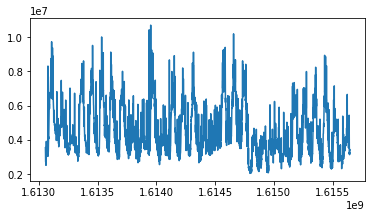

In [47]:
plt.plot(nile.time, nile.val)

In [26]:
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [27]:
np.bincount(hidden_states)

array([3046, 1274], dtype=int64)

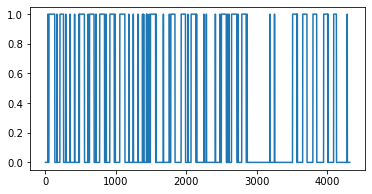

In [28]:
plt.plot(hidden_states)

In [29]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     # re-order parameters in ascending order of mean of underlying distribution
#     idx      = np.argsort(mus)
#     mus      = mus[idx]
#     sigmas   = sigmas[idx]
#     transmat = transmat[idx, :][:, idx]
    
#     state_dict = {}
#     states = [i for i in range(n_states)]
#     for i in idx:
#         state_dict[i] = states[idx[i]]
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [30]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 2)

[3614425.92109889 6259364.30423112]
[606292.5370343 972915.4939039]


In [45]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('traffic', color=color)
    ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

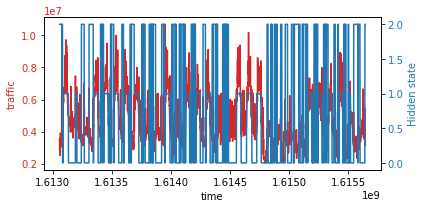

In [46]:
plot_states(nile.val, hidden_states, nile.time)

<span style="font-size: 200%; color: red;">Improvement</span>

In [50]:
np.where(hidden_states == 0)

(array([  43,   44,   45, ..., 4310, 4311, 4312], dtype=int64),)

In [51]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)

[4013893.98  3299176.903 6474879.908]
[761347.099 306389.902 866647.873]


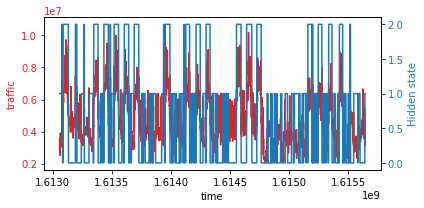

In [52]:
plot_states(nile.val, hidden_states, nile.time)

In [41]:
mus

array([4013903.13122789, 6474924.78866406, 3299309.19408482])

In [42]:
np.set_printoptions(precision = 3, suppress = True)